In [54]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [130]:
pd.set_options('max_columns', None)

In [104]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import MinMaxScaler

## There are 25 variables:

##### 1: ID: ID of each client
##### 2: LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit
##### 3: SEX: Gender (1=male, 2=female)
##### 4: EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
##### 5: MARRIAGE: Marital status (1=married, 2=single, 3=others)
##### 6: AGE: Age in years
##### 7: PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
##### 8: PAY_2: Repayment status in August, 2005 (scale same as above)
##### 9: PAY_3: Repayment status in July, 2005 (scale same as above)
##### 10: PAY_4: Repayment status in June, 2005 (scale same as above)
##### 11: PAY_5: Repayment status in May, 2005 (scale same as above)
##### 12: PAY_6: Repayment status in April, 2005 (scale same as above)
##### 13: BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
##### 14: BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
##### 15: BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
##### 16: BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
##### 17: BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
##### 18: BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
##### 19: PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
##### 20: PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
##### 21: PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
##### 22: PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
##### 23: PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
##### 24: PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
##### 25: default.payment.next.month: Default payment (1=yes, 0=no)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Sanket-Mote/Credit_Card_Default_Prediction/main/UCI_Credit_Card.csv?token=GHSAT0AAAAAAB3DOGZC6EWXKXRJYHNLGE2YY3PURGA")

In [4]:
#Dropping ID column as it is simple numbering in data (Sort of Serial Nos)
print(df.shape)
df.drop(['ID'], axis = 1, inplace=True)
print(df.shape)

(30000, 25)
(30000, 24)


### Since we have 2 possible outcomes this problem statement is a 2 class classification problem statement

In [5]:
df['default.payment.next.month'].unique()

array([1, 0], dtype=int64)

In [11]:
#No missing values in the data
df.isnull().sum()

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [13]:
#Dropped Duplicates
print(df.shape)
df.drop_duplicates(inplace = True)
print(df.shape)

(30000, 24)
(29965, 24)


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
LIMIT_BAL,29965.0,167442.005006,129760.135222,10000.0,50000.0,140000.0,240000.0,1000000.0
SEX,29965.0,1.603738,0.489128,1.0,1.0,2.0,2.0,2.0
EDUCATION,29965.0,1.853629,0.790411,0.0,1.0,2.0,2.0,6.0
MARRIAGE,29965.0,1.551877,0.521997,0.0,1.0,2.0,2.0,3.0
AGE,29965.0,35.487969,9.219459,21.0,28.0,34.0,41.0,79.0
PAY_0,29965.0,-0.016753,1.123492,-2.0,-1.0,0.0,0.0,8.0
PAY_2,29965.0,-0.131854,1.196322,-2.0,-1.0,0.0,0.0,8.0
PAY_3,29965.0,-0.164392,1.195878,-2.0,-1.0,0.0,0.0,8.0
PAY_4,29965.0,-0.218922,1.168175,-2.0,-1.0,0.0,0.0,8.0
PAY_5,29965.0,-0.264509,1.132220,-2.0,-1.0,0.0,0.0,8.0


In [42]:
float_dtypes = list(df.columns[df.dtypes == "float64"])
int_dtypes = list(df.columns[df.dtypes == "int64"])

In [47]:
#Creating equal size column list for better visualization
int_dtypes.append('LIMIT_BAL')
float_dtypes.remove('LIMIT_BAL')

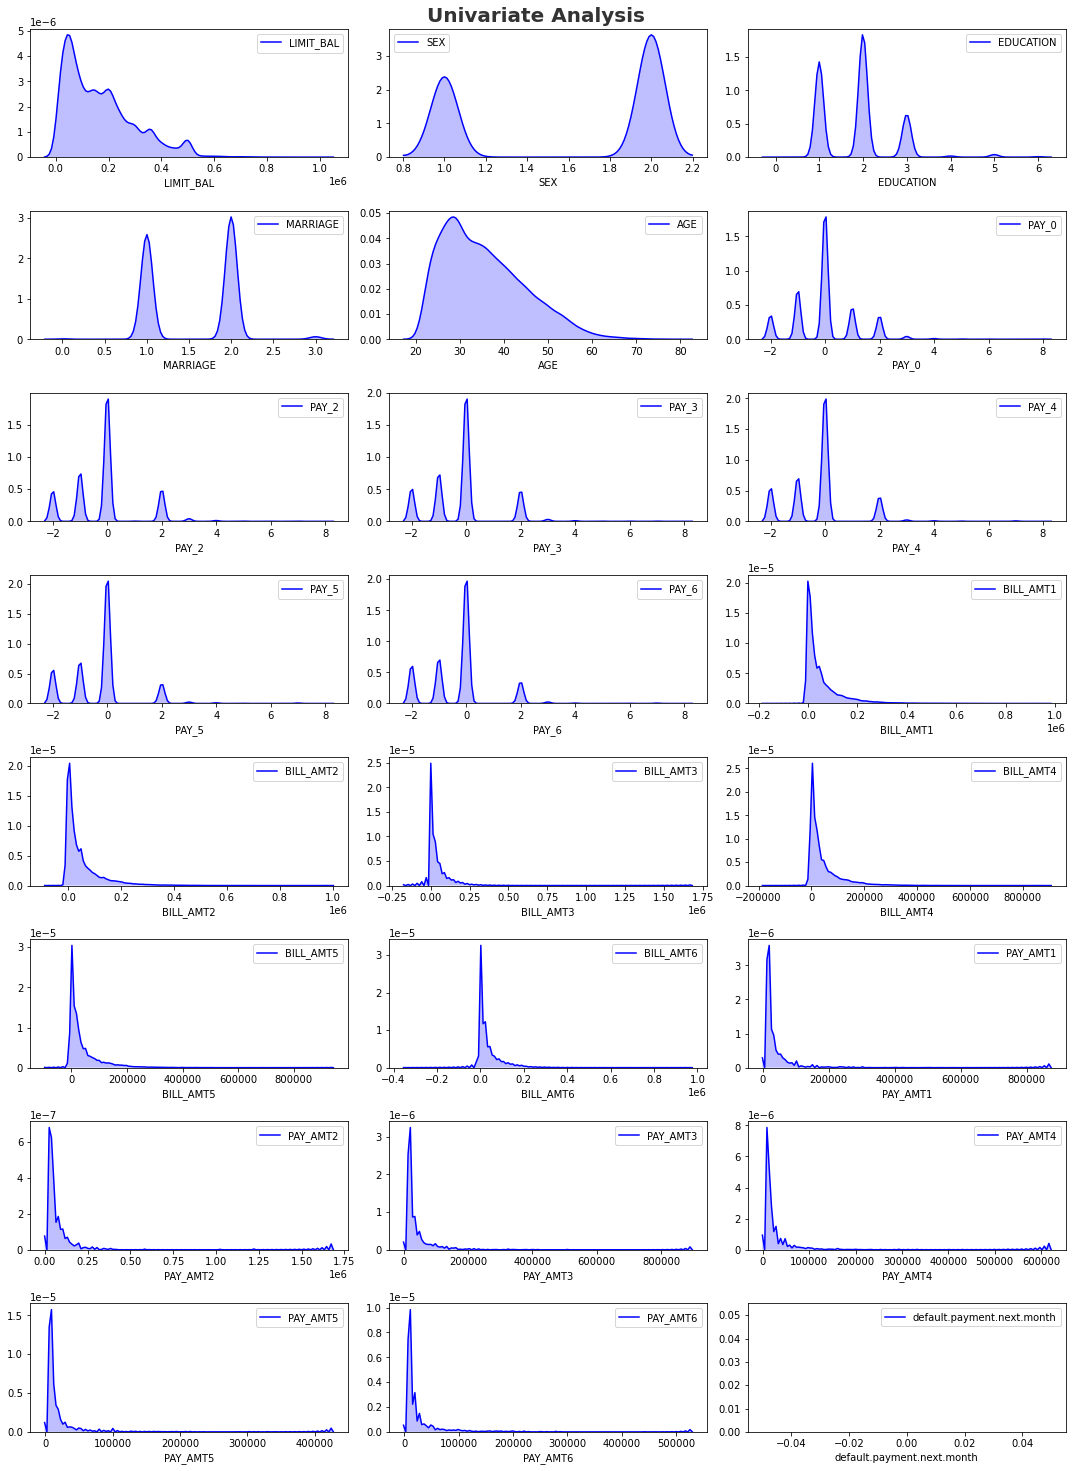

In [55]:
plt.figure(figsize=(15, 25))
plt.suptitle('Univariate Analysis - Distributions', fontsize=20, fontweight='bold', alpha=0.8, y=1.)
lst_col = list(df.columns)

for i in range(0, len(lst_col)):
    plt.subplot(10, 3, i+1)
    sns.kdeplot(data=df[lst_col[i]],shade=True, color='b')
    plt.xlabel(lst_col[i])
    plt.tight_layout()

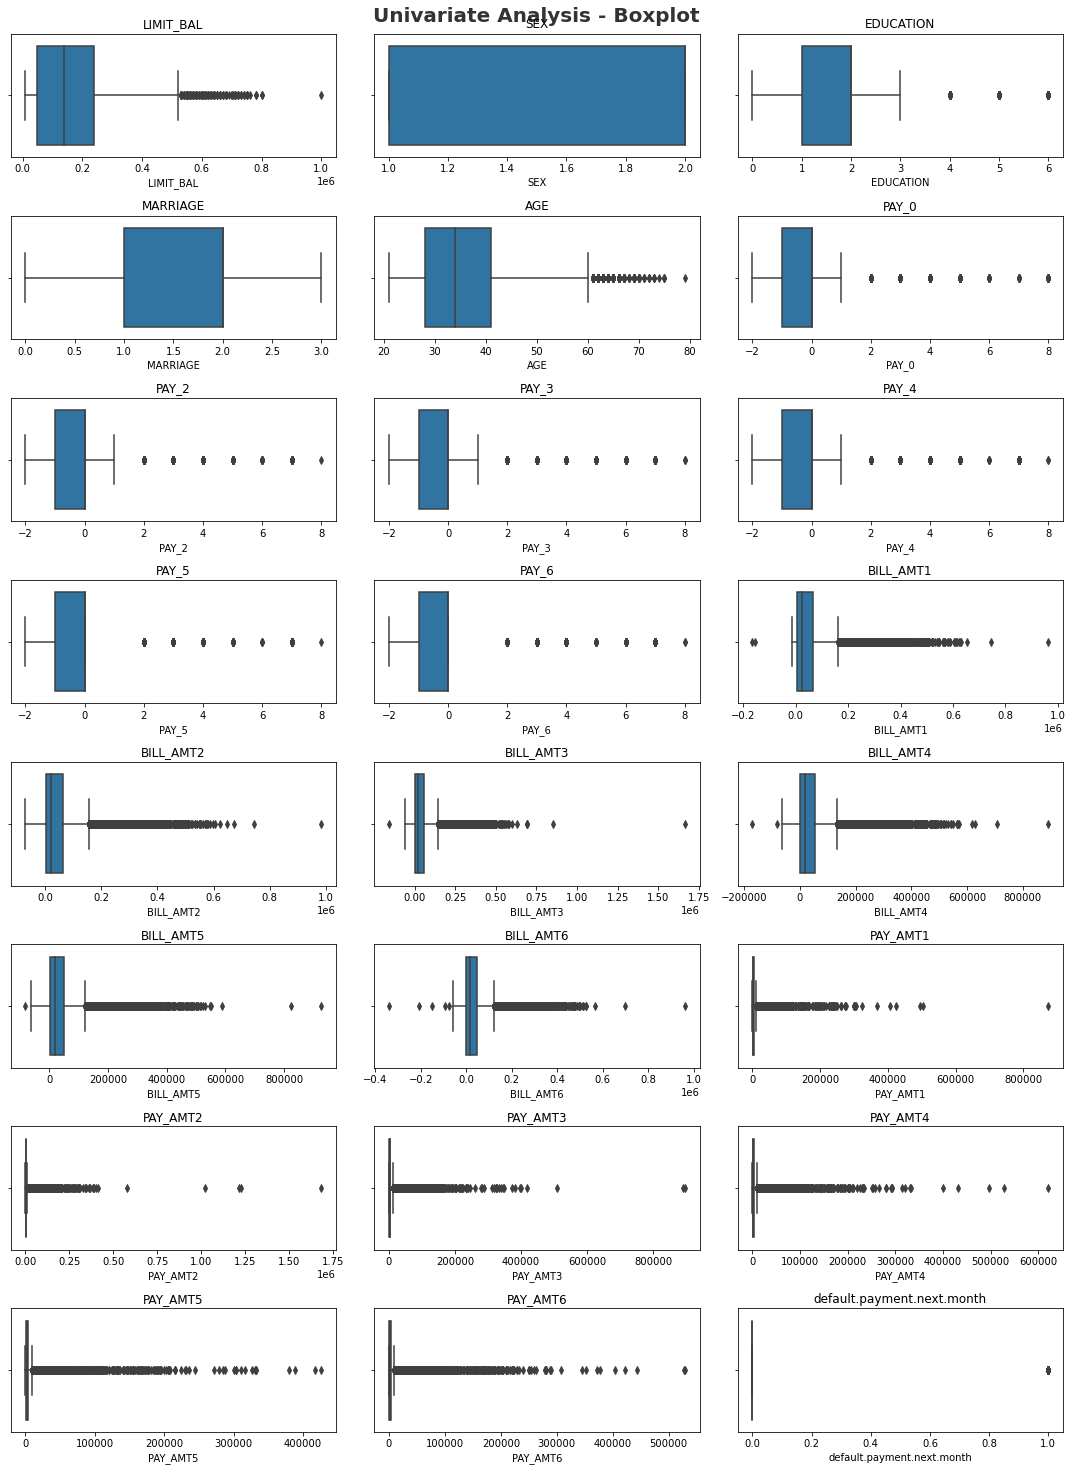

In [61]:
plt.figure(figsize = (15, 25))
plt.suptitle("Univariate Analysis - Boxplot", fontsize = 20, fontweight = 'bold', alpha = 0.8, y = 1.)

for i in range(0, len(lst_col)):
    plt.subplot(10,3,i+1)
    sns.boxplot(df[lst_col[i]])
    plt.title(lst_col[i])
    plt.tight_layout()

In [73]:
df_independent = df.iloc[:,0:23]
df_dependent = df.iloc[:,-1:]

In [81]:
X_train, Y_train, X_test, Y_test = train_test_split(df_independent, df_dependent, train_size = 0.75, random_state = 12, stratify = df_dependent)

In [82]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(22473, 23)
(7492, 23)
(22473, 1)
(7492, 1)


In [91]:
sc = StandardScaler()
train_sc = sc.fit_transform(X_train)

In [92]:
df_train_sc = pd.DataFrame(train_sc, columns = X_train.columns)

In [93]:
test_sc = sc.transform(Y_train)
df_test_sc = pd.DataFrame(test_sc, columns = Y_train.columns)

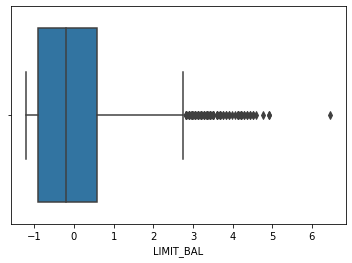

In [95]:
sns.boxplot(df_train_sc['LIMIT_BAL'])

In [97]:
min_sc = MinMaxScaler()
train_msc = min_sc.fit_transform(X_train)
df_train_msc = pd.DataFrame(train_msc, columns = X_train.columns)

In [100]:
test_msc = min_sc.transform(Y_train)
df_test_msc = pd.DataFrame(test_msc, columns = Y_train.columns)

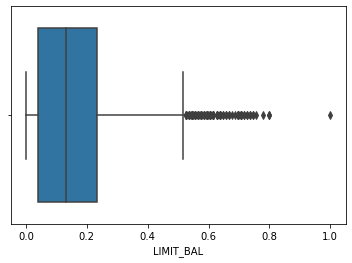

In [102]:
sns.boxplot(df_train_msc['LIMIT_BAL'])

## Model Fitting

In [106]:
#Decision Tree
dtc = DecisionTreeClassifier()
model_dt = dtc.fit(df_train_msc, X_test)

In [108]:
model_dt.score(df_train_msc, X_test)

0.9994215280558892

In [109]:
pred_dt = model_dt.predict(Y_train)

In [110]:
from sklearn.metrics import accuracy_score, average_precision_score, f1_score, precision_score, recall_score, roc_auc_score

In [116]:
print("Accuracy Score : {}".format(accuracy_score(Y_test, pred_dt)))
print("Avg Precision Score : {}".format(average_precision_score(Y_test, pred_dt)))
print("F1 Score : {}".format(f1_score(Y_test, pred_dt)))
print("Precision Score : {}".format(precision_score(Y_test, pred_dt)))
print("Recall Score : {}".format(recall_score(Y_test, pred_dt)))
print("ROC AUC Score : {}".format(roc_auc_score(Y_test, pred_dt)))

Accuracy Score : 0.26468232781633744
Avg Precision Score : 0.20801606036548462
F1 Score : 0.32661043882165997
Precision Score : 0.20481373601103786
Recall Score : 0.8057901085645356
ROC AUC Score : 0.4583458599044824


In [117]:
#SVC
svc = SVC()
model_svc = svc.fit(df_train_sc, X_test)

In [118]:
model_svc.score(df_train_msc, X_test)

0.7787567302985805

In [119]:
pred_svc = model_svc.predict(Y_train)

In [126]:
print("Accuracy Score : {}".format(accuracy_score(Y_test, pred_svc)))
print("Avg Precision Score : {}".format(average_precision_score(Y_test, pred_svc)))
print("F1 Score : {}".format(f1_score(Y_test, pred_svc)))
print("Precision Score : {}".format(precision_score(Y_test, pred_svc)))
print("Recall Score : {}".format(recall_score(Y_test, pred_svc)))
print("ROC AUC Score : {}".format(roc_auc_score(Y_test, pred_svc)))

Accuracy Score : 0.7786972770955686
Avg Precision Score : 0.2213027229044314
F1 Score : 0.0
Precision Score : 0.0
Recall Score : 0.0
ROC AUC Score : 0.5


In [121]:
#Logistic Regression
lr = LogisticRegression()
model_lr = lr.fit(df_train_sc, X_test)

In [122]:
model_lr.score(df_train_sc, X_test)

0.8103501980153962

In [127]:
pred_lr = model_lr.predict(Y_train)

In [128]:
print("Accuracy Score : {}".format(accuracy_score(Y_test, pred_lr)))
print("Avg Precision Score : {}".format(average_precision_score(Y_test, pred_lr)))
print("F1 Score : {}".format(f1_score(Y_test, pred_lr)))
print("Precision Score : {}".format(precision_score(Y_test, pred_lr)))
print("Recall Score : {}".format(recall_score(Y_test, pred_lr)))
print("ROC AUC Score : {}".format(roc_auc_score(Y_test, pred_lr)))

Accuracy Score : 0.7786972770955686
Avg Precision Score : 0.2213027229044314
F1 Score : 0.0
Precision Score : 0.0
Recall Score : 0.0
ROC AUC Score : 0.5
